# Imports

In [50]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Survey results

In [51]:
df_form = pd.read_excel('Improving Generative AI Images Through Negative Prompt(1-45).xlsx')
prompt_columns = df_form.filter(regex='^Rank the following three images according to their suitability based on this description:')

In [52]:
df_data = pd.read_csv('form_imgs/csvfile.csv', delimiter=';')
df_data = df_data.set_index('id')

In [53]:
def letter_pos(row, let):
    letters = row.split(';')
    return letters.index(let) + 1

In [54]:
prompts = []
pos_dict = dict()

for i, prompt in enumerate(prompt_columns):
    prompts.append(prompt)
    pos_dict[prompt] = {'best':[], 'worst':[], 'base':[]}
    
    for let in ['A', 'B', 'C']:
        for j, row in prompt_columns.iterrows():
            img_type = df_data.loc[i][let]
            pos_dict[prompt][img_type].append(letter_pos(row[prompt], let))

In [55]:
res_mean_dict = dict()
res_std_dict = dict()
for prompt in pos_dict.keys():
    res_mean_dict[prompt] = []
    res_mean_dict[prompt].append(np.mean(pos_dict[prompt]['best']))
    res_mean_dict[prompt].append(np.mean(pos_dict[prompt]['worst']))
    res_mean_dict[prompt].append(np.mean(pos_dict[prompt]['base']))
    
    res_std_dict[prompt] = []
    res_std_dict[prompt].append(np.std(pos_dict[prompt]['best']))
    res_std_dict[prompt].append(np.std(pos_dict[prompt]['worst']))
    res_std_dict[prompt].append(np.std(pos_dict[prompt]['base']))

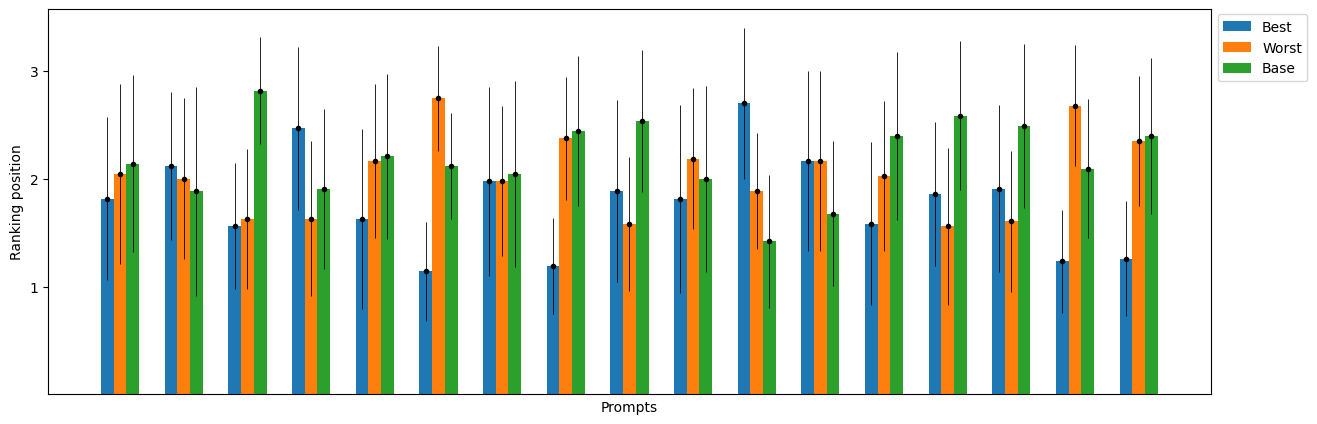

In [56]:
fig = plt.figure(figsize=(15,5))

prompt_list = list(res_mean_dict.keys())
# Delete \n from one prompt
prompt_list[9] = prompt_list[9][:-1]

mean_res = np.array(list(res_mean_dict.values()))
std_res = np.array(list(res_std_dict.values()))

x = np.arange(len(prompt_list))
w = 0.20

plt.bar(x-w, mean_res[:,0], w)
plt.bar(x, mean_res[:,1], w)
plt.bar(x+w, mean_res[:,2], w)
plt.errorbar(x-w, mean_res[:,0], yerr=std_res[:,0], fmt=".", color="k", linewidth=0.6)
plt.errorbar(x, mean_res[:,1], yerr=std_res[:,1], fmt=".", color="k", linewidth=0.6)
plt.errorbar(x+w, mean_res[:,2], yerr=std_res[:,2], fmt=".", color="k", linewidth=0.6)

plt.yticks([1,2,3])
#plt.xticks(x, prompt_list, rotation=90) 
plt.xticks([]) 
plt.legend(['Best', 'Worst', 'Base'], loc='center left', bbox_to_anchor=(1, 0.9))

plt.xlabel('Prompts')
plt.ylabel('Ranking position')

plt.show()

In [57]:
print(f'Mean position of best image: {np.mean(mean_res[:,0]):.2f} +- {np.mean(std_res[:,0]):.2f}')
print(f'Mean position of worst image: {np.mean(mean_res[:,1]):.2f} +- {np.mean(std_res[:,1]):.2f}')
print(f'Mean position of base image: {np.mean(mean_res[:,2]):.2f} +- {np.mean(std_res[:,2]):.2f}')

Mean position of best image: 1.78 +- 0.70
Mean position of worst image: 2.03 +- 0.66
Mean position of base image: 2.18 +- 0.72


# Optimization results

In [58]:
train_df = pd.read_csv('results/csvfile.csv', delimiter=';')

In [59]:
def sim_diff(sim_hist):
    sims = ast.literal_eval(sim_hist)
    return max(sims) / sims[0]

In [11]:
diffs = train_df['sim_hist'].apply(sim_diff)
print(f'Similarity mean improvement: {diffs.mean():.7f} +- {diffs.std():.2f}')

Similarity mean improvement: 1.2441073 +- 0.20


In [76]:
first_sim = []
for index, row in train_df.iterrows():
    first_sim.append(ast.literal_eval(row['sim_hist'])[0])

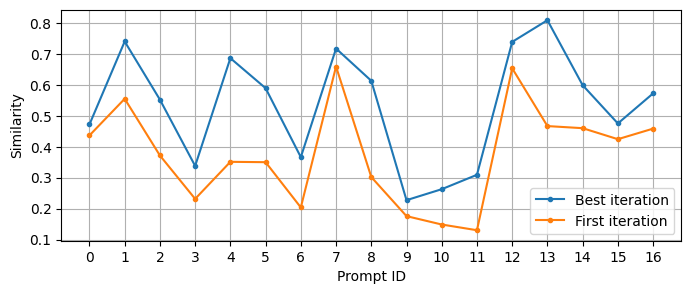

In [87]:
fig = plt.figure(figsize=(8,3))

plt.plot(train_df['best_sim'], marker='.')
plt.plot(first_sim, marker='.')

plt.xticks(ticks=np.arange(len(prompt_list)))
plt.xlabel("Prompt ID")
plt.ylabel("Similarity")
plt.legend(["Best iteration", "First iteration"]);
plt.grid()

plt.show()

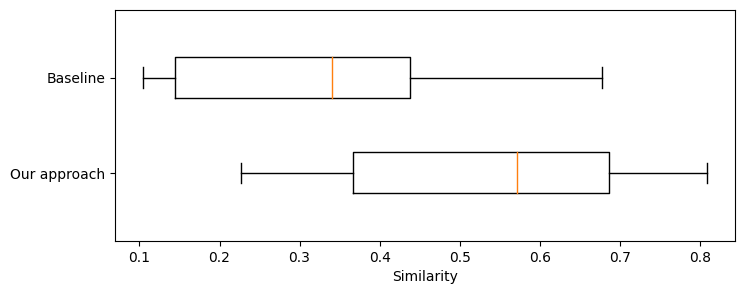

In [88]:
fig = plt.figure(figsize=(8,3))

plt.boxplot([train_df['best_sim'], train_df['base_sim']], labels=['Our approach', 'Baseline'],
            vert=False, positions=[0, 0.7], widths=[0.3, 0.3])
plt.xlabel("Similarity")

plt.show()

In [89]:
def get_num_neg(neg_words):
    return ast.literal_eval(neg_words)[-1]

In [90]:
num_words = train_df['neg_words_num_hist'].apply(get_num_neg)
print(f'Number of negative words: {num_words.mean():.2f} +- {num_words.std():.2f}')

Number of negative words: 16.00 +- 19.58
